# <center>House Price Prediction Using different Machine Learning Algorithms

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

#### Loading the Dataset

In [2]:
data=pd.read_csv('./BHP.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


#### Exploring the Data

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.sample(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5733,Super built-up Area,Ready To Move,AECS Layout,2 BHK,CMhamai,1123,2.0,2.0,64.00
10905,Super built-up Area,Ready To Move,KR Puram,3 BHK,SLontel,1300,2.0,2.0,57.00
7433,Super built-up Area,Ready To Move,Mahadevpura,2 BHK,Neagar,1438,2.0,NaN,89.00
5545,Super built-up Area,Ready To Move,Bannerghatta Road,4 BHK,NaN,2700,4.0,3.0,260.00
4794,Super built-up Area,Ready To Move,Kalyan nagar,4 BHK,Satle C,2422,3.0,2.0,150.00
1251,Built-up Area,Ready To Move,Lakshminarayana Pura,2 BHK,RothaVa,1180,2.0,2.0,75.00
12036,Super built-up Area,19-Mar,Sarjapur Road,2 BHK,AsastDe,1112,2.0,1.0,62.00
8454,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1140,2.0,1.0,48.70
12212,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,120.00
7390,Super built-up Area,Ready To Move,Horamavu Agara,3 BHK,NaN,1250,3.0,2.0,65.00


In [7]:
data.shape

(13320, 9)

In [8]:
# Statistical summary
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#### Data Cleaning

##### Checking null values

In [9]:
data.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

##### Dropping the null values

In [10]:
data.dropna(inplace=True)

##### Checking duplicate values

In [11]:
data.duplicated().sum()

352

##### Dropping the duplicated values

In [12]:
data.drop_duplicates(inplace=True)

### Data Visualization

##### Univariate Analysis

#### Box Plot

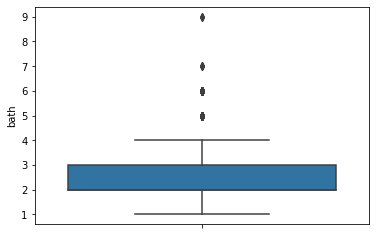

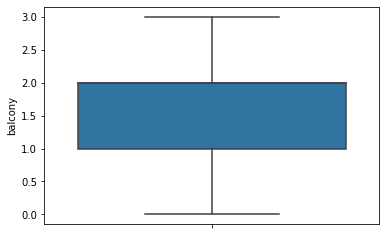

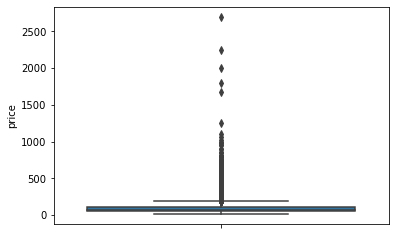

In [13]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i])
        plt.show()

#### Histogram

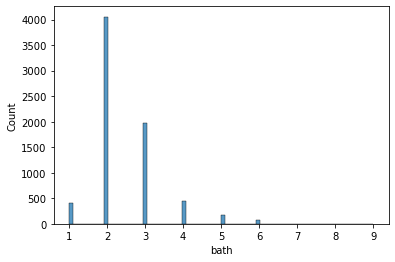

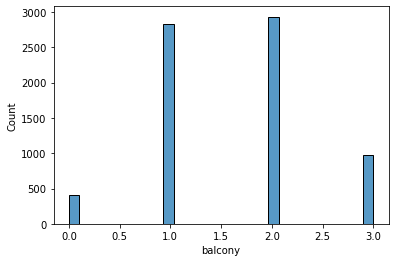

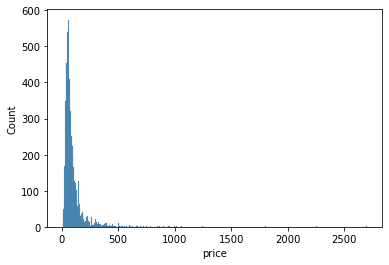

In [14]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(x=data[i])
        plt.show()

#### KDE Plot

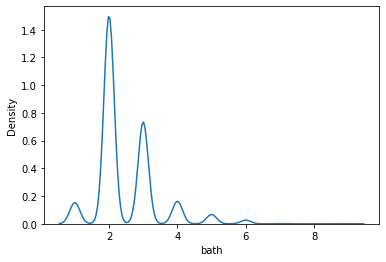

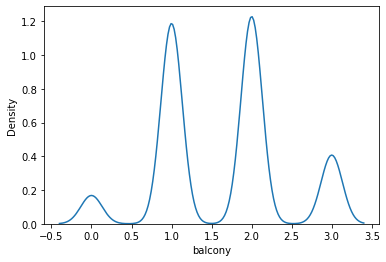

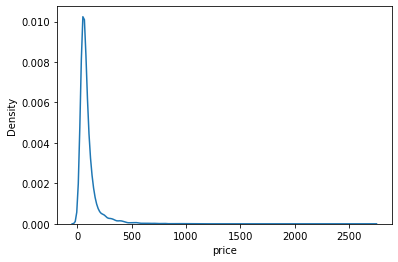

In [15]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.kdeplot(x=data[i])
        plt.show()

#### Find and Remove Outlier

In [16]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [17]:
for column in data.columns:
    if data[column].dtype != 'object':
        UL,LL = outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

##### After outlier treatment , drop th null values

In [18]:
data.dropna(inplace=True)

In [19]:
data['size'].unique()

array(['2 BHK', '3 BHK', '3 Bedroom', '1 RK', '4 BHK', '1 BHK',
       '4 Bedroom', '2 Bedroom', '5 Bedroom'], dtype=object)

In [20]:
data.size=data['size'].str.replace('BHK','')
data.size=data['size'].str.replace('Bedroom','')
data.size=data['size'].str.replace('RK','').astype(float)

### Multivariate Analysis

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 0 to 13317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     6455 non-null   object 
 1   availability  6455 non-null   object 
 2   location      6455 non-null   object 
 3   size          6455 non-null   float64
 4   society       6455 non-null   object 
 5   total_sqft    6455 non-null   object 
 6   bath          6455 non-null   float64
 7   balcony       6455 non-null   float64
 8   price         6455 non-null   float64
dtypes: float64(4), object(5)
memory usage: 504.3+ KB


#### Pair Plot

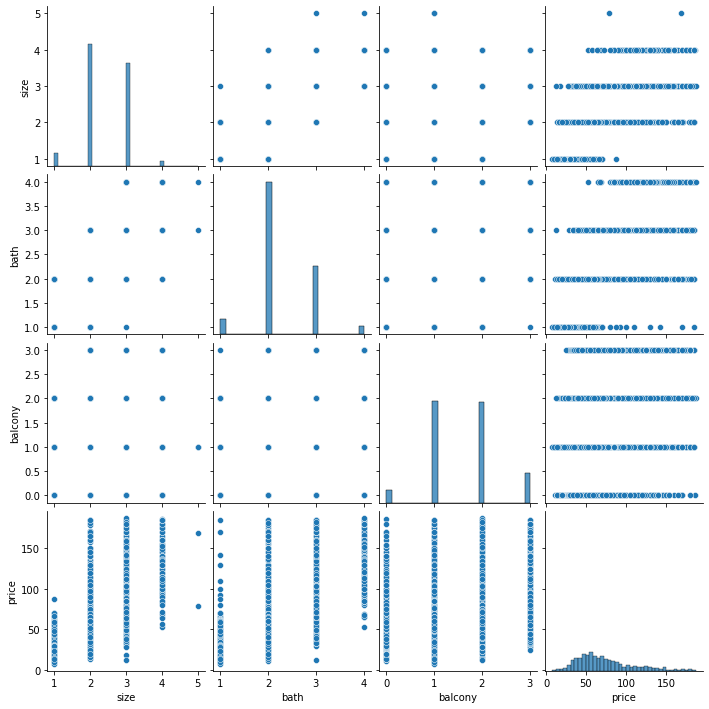

In [22]:
sns.pairplot(data=data);

#### Count Plot

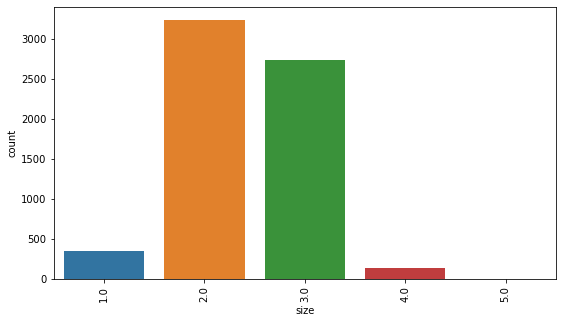

In [23]:
plt.figure(figsize=(9,5))
sns.countplot('size',data=data)
plt.xticks(rotation=90)
plt.show()

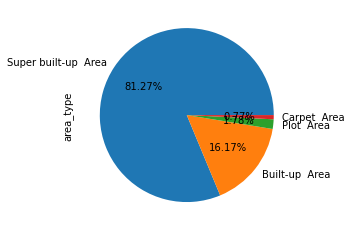

In [24]:
data.area_type.value_counts().plot.pie(autopct='%1.2f%%');

#### Label Encoding

In [25]:
le = LabelEncoder()
data['area_type'] = le.fit_transform(data['area_type'])
data['availability'] = le.fit_transform(data['availability'])
data['location'] = le.fit_transform(data['location'])
data['society'] = le.fit_transform(data['society'])
data['total_sqft'] = le.fit_transform(data['total_sqft'])

#### Using the Heatmap check the correlation of other variables with the target variable "price"

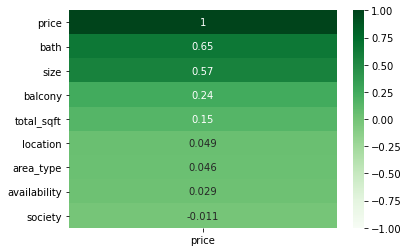

In [26]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

#### Feature Selection

In [27]:
x= data[['bath','size','balcony','total_sqft']].values
y = data[['price']].values

#### Scaling

In [28]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### Splitting the data into training and testing

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Finding the best model using Cross validation

In [30]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  25.958358331568128
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  25.95835429853563
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  26.250425742765895
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  24.383931385057643
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  24.503180939056605
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  22.081150387329394
***********************************************

#### Based on the rmse values,selecting Random Forest as the model 

In [32]:
model = RandomForestRegressor()

In [33]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = model.predict(x)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.sample(5)

,ACTUAL,PREDICTION
143,131.00,119.933667
2908,50.00,56.105000
5315,60.90,62.378521
5887,33.00,33.201600
2331,77.68,94.296367


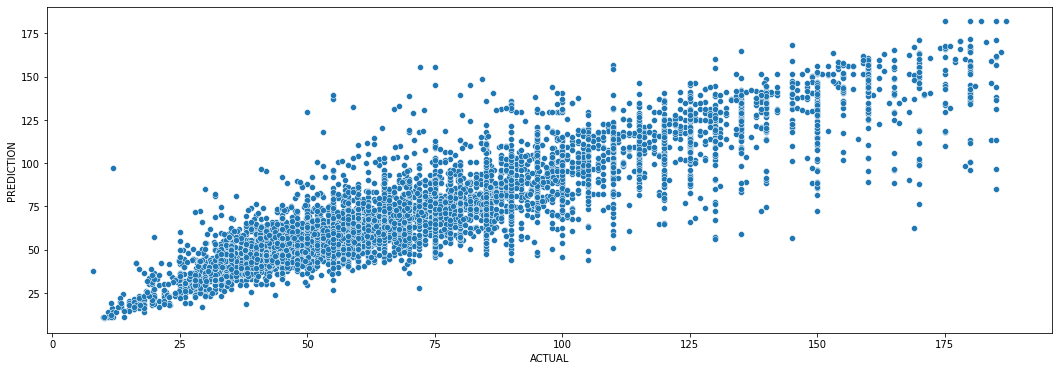

In [35]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result);

#### Conclusion

Based on the provided data, it seems that the Random Forest Regressor model has learned the relationships between the input features and the target variable to some degree. The model is making predictions that align with the actual prices.Also from the above scatter plot, we can understand that the actual values and the predicted values are highly correlated with each other.
